<a href="https://colab.research.google.com/github/Ramisrkit/booking_cancellation_prediction/blob/main/Hotel_Booking_Cancellation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import pandas as pd

In [135]:
df=pd.read_csv('/content/booking.csv')

In [136]:
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [137]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [138]:
df['family']=df['number of adults']+df['number of children']

In [139]:
df['family']

,family
0,2
1,1
2,3
3,1
4,1
...,...
36280,2
36281,2
36282,2
36283,3


In [140]:
df.drop(['Booking_ID','number of adults','number of children','repeated', 'P-C', 'P-not-C', 'average price', 'special requests','date of reservation'],axis=1,inplace=True)

In [141]:
df

,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,booking status,family
0,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,Not_Canceled,2
1,1,3,Not Selected,0,Room_Type 1,5,Online,Not_Canceled,1
2,1,3,Meal Plan 1,0,Room_Type 1,1,Online,Canceled,3
3,0,2,Meal Plan 1,0,Room_Type 1,211,Online,Canceled,1
4,1,2,Not Selected,0,Room_Type 1,48,Online,Canceled,1
...,...,...,...,...,...,...,...,...,...
36280,0,2,Meal Plan 2,0,Room_Type 1,346,Online,Canceled,2
36281,1,3,Meal Plan 1,0,Room_Type 1,34,Online,Not_Canceled,2
36282,1,3,Meal Plan 1,0,Room_Type 4,83,Online,Not_Canceled,2
36283,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,Not_Canceled,3


In [142]:
df.dtypes

,0
number of weekend nights,int64
number of week nights,int64
type of meal,object
car parking space,int64
room type,object
lead time,int64
market segment type,object
booking status,object
family,int64


In [143]:
df.isnull().sum()

,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0
booking status,0
family,0


In [144]:
df.duplicated().value_counts()

,count
True,18760
False,17525


In [145]:
df.drop_duplicates(inplace=True)

In [146]:
df

,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,booking status,family
0,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,Not_Canceled,2
1,1,3,Not Selected,0,Room_Type 1,5,Online,Not_Canceled,1
2,1,3,Meal Plan 1,0,Room_Type 1,1,Online,Canceled,3
3,0,2,Meal Plan 1,0,Room_Type 1,211,Online,Canceled,1
4,1,2,Not Selected,0,Room_Type 1,48,Online,Canceled,1
...,...,...,...,...,...,...,...,...,...
36273,0,3,Not Selected,0,Room_Type 1,63,Online,Canceled,2
36276,2,3,Not Selected,0,Room_Type 1,5,Online,Not_Canceled,2
36279,1,1,Not Selected,0,Room_Type 1,48,Online,Canceled,2
36281,1,3,Meal Plan 1,0,Room_Type 1,34,Online,Not_Canceled,2


In [147]:
import seaborn as sns

In [148]:
number=df.select_dtypes(include=['int64','float64']).columns

In [149]:
import matplotlib.pyplot as plt


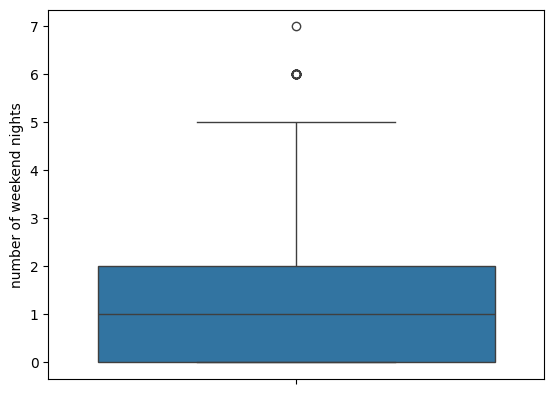

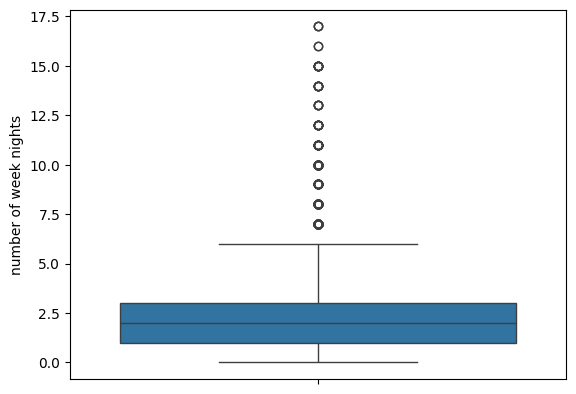

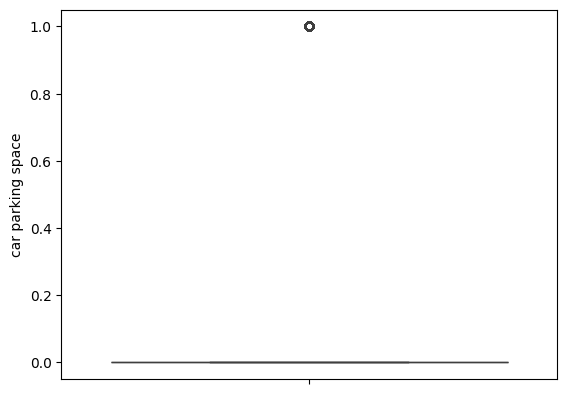

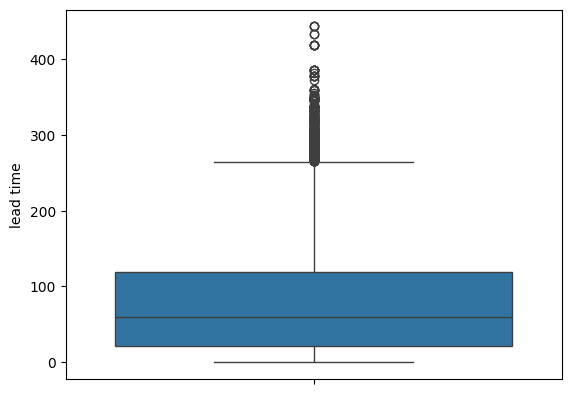

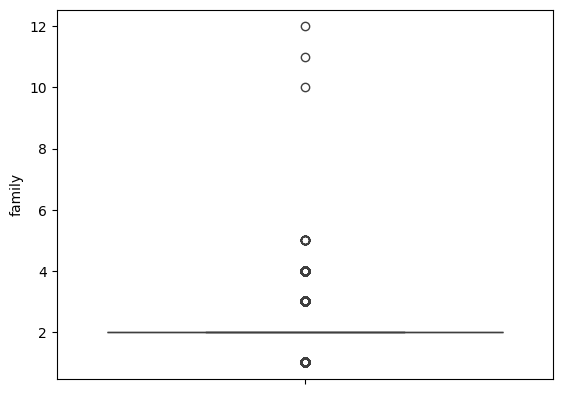

In [150]:
for i in number:
  sns.boxplot(df[i])
  plt.show()

In [151]:
for i in number:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  low=q1-1.5*iqr
  high=q3+1.5*iqr
  df[i]=df[i].clip(low,high)

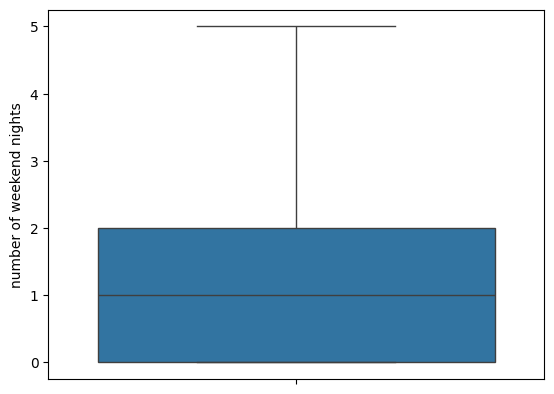

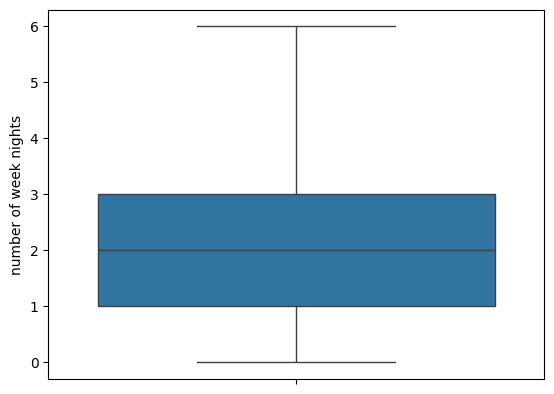

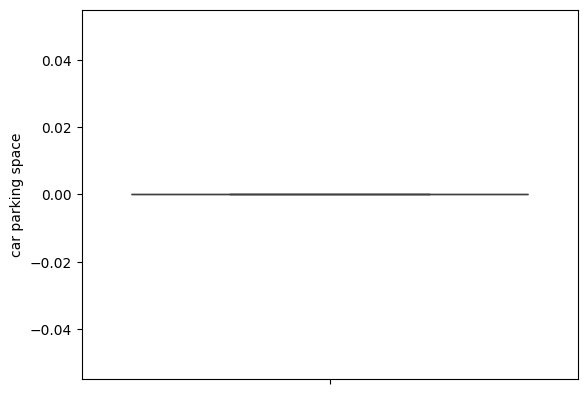

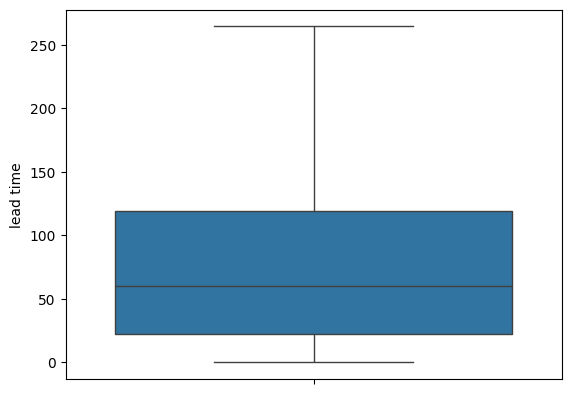

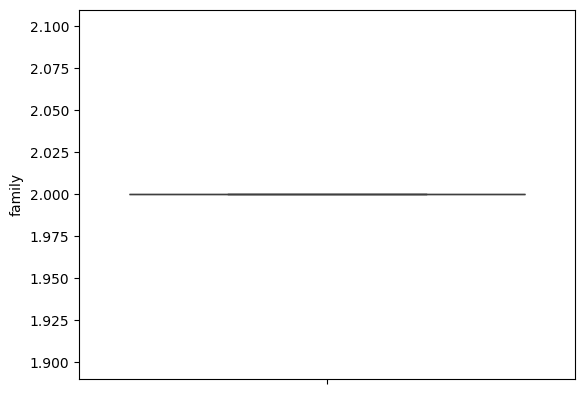

In [152]:
for i in number:
  sns.boxplot(df[i])
  plt.show()

In [153]:
category=df.select_dtypes(include='object').columns.drop('booking status')

In [154]:
from sklearn.preprocessing import LabelEncoder

In [222]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [223]:
le=LabelEncoder()
for i in category:
  df[i]=le.fit_transform(df[i])

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(['booking status'],axis=1),df['booking status'],test_size=0.2,random_state=42)


In [226]:
from sklearn.tree import DecisionTreeClassifier

In [231]:
dt=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,min_samples_split=15,min_samples_leaf=7,class_weight='balanced'),n_estimators=100,random_state=42)

In [232]:
dt.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1,
                                                    min_samples_leaf=7,
                                                    min_samples_split=15),
                   n_estimators=100, random_state=42)

In [233]:
dt.predict(x_test)

array(['Not_Canceled', 'Canceled', 'Not_Canceled', ..., 'Not_Canceled',
       'Not_Canceled', 'Not_Canceled'], dtype=object)

In [234]:
dt.score(x_train,y_train)

0.7040656205420828

In [235]:
dt.score(x_test,y_test)

0.7089871611982882

In [204]:
parameters={
    "max_depth":[2,5,7,10,12,15],
    "min_samples_split":[0.5,15,20,25,30,35,40],
    "min_samples_leaf":[1,2,4,6,7,5],
    "max_samples":[0.25,0.30,0.35,0.40],
    "bootstrap":[True],
    "max_features":[0.8,0.9,1,0.7],
    "n_estimators":[100,150,200,250,300],
    "class_weight":['balanced']

}

In [205]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
grid=RandomizedSearchCV(estimator=dt,cv=3,param_distributions=parameters,scoring='accuracy',n_jobs=-1,verbose=1,n_iter=40)

In [206]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    max_depth=10,
                                                    max_features=1,
                                                    max_samples=0.35,
                                                    min_samples_leaf=5,
                                                    min_samples_split=15,
                                                    n_estimators=300,
                                                    random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'class_weight': ['balanced'],
                                        'max_depth': [2, 5, 7, 10, 12, 15],
                                        'max_features': [0.8, 0.9, 1, 0.7],
                                        'max_samples': [0.25, 0.3, 0.35, 0.4],
                                        'min_samples_leaf': [1, 2, 4, 6, 7, 5],
                                        'min_samples_split': [0.5, 15, 20, 25,
                                                              30, 35, 40],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   scoring='accuracy', verbose=1)

In [207]:
grid.score(x_train,y_train)

0.7022906986223201

In [208]:
grid.score(x_test,y_test)

0.7092050209205021

In [209]:
grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 7,
 'max_samples': 0.3,
 'max_features': 0.8,
 'max_depth': 2,
 'class_weight': 'balanced',
 'bootstrap': True}